# Importing library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
pd.options.plotting.backend = "plotly"

# Loading MNIST Dataset

In [2]:
mnist=tf.keras.datasets.mnist

# Spliting Dataset 

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()

# Standardizing The Data

In [4]:
X_train,X_test=X_train/255.,X_test/255.

## Understanding The Shape

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
X_train.shape

(60000, 28, 28)

## Explanding dims

In [7]:
X_train,X_test=np.expand_dims(X_train,axis=-1),np.expand_dims(X_test,axis=-1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

## Ploting images

In [ ]:
_, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()
for img, ax in zip(X_train, axs):
    ax.imshow(img,cmap="gray")
plt.show()

# Defining the Model

In [9]:
from tensorflow import keras
def build_model():
    model = keras.Sequential()
    
    model.add(KL.Input(shape=(28,28,1)))
    
    model.add(KL.Conv2D(filters=32, kernel_size=(3, 3),padding="valid", activation="relu") )
    
    model.add(KL.MaxPooling2D((2, 2),(2, 2)))
    
    model.add(KL.Dropout(0.20))
    
    model.add(KL.Conv2D(filters=64, kernel_size=(3, 3),padding="valid", activation="relu"))
    
    model.add(KL.MaxPooling2D((2, 2),(2, 2)))
    
    model.add(KL.Dropout(0.20))
    
    model.add(KL.Conv2D(filters=128, kernel_size=(3, 3),padding="valid",activation="relu"))
    
    model.add(KL.Flatten())
    
    model.add(KL.Dense(128,activation="relu"))
    
    model.add(KL.Dense(10, activation = 'softmax'))

    model.summary()

    return model

model = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [10]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split=0.2)

## Evaluating Model

In [ ]:
test_loss,test_acc = model.evaluate(X_test,y_test)

## Fetching Predicted classes

In [13]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 3s 8ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Ploting Model predictions

313/313 [==============================] - 2s 8ms/step


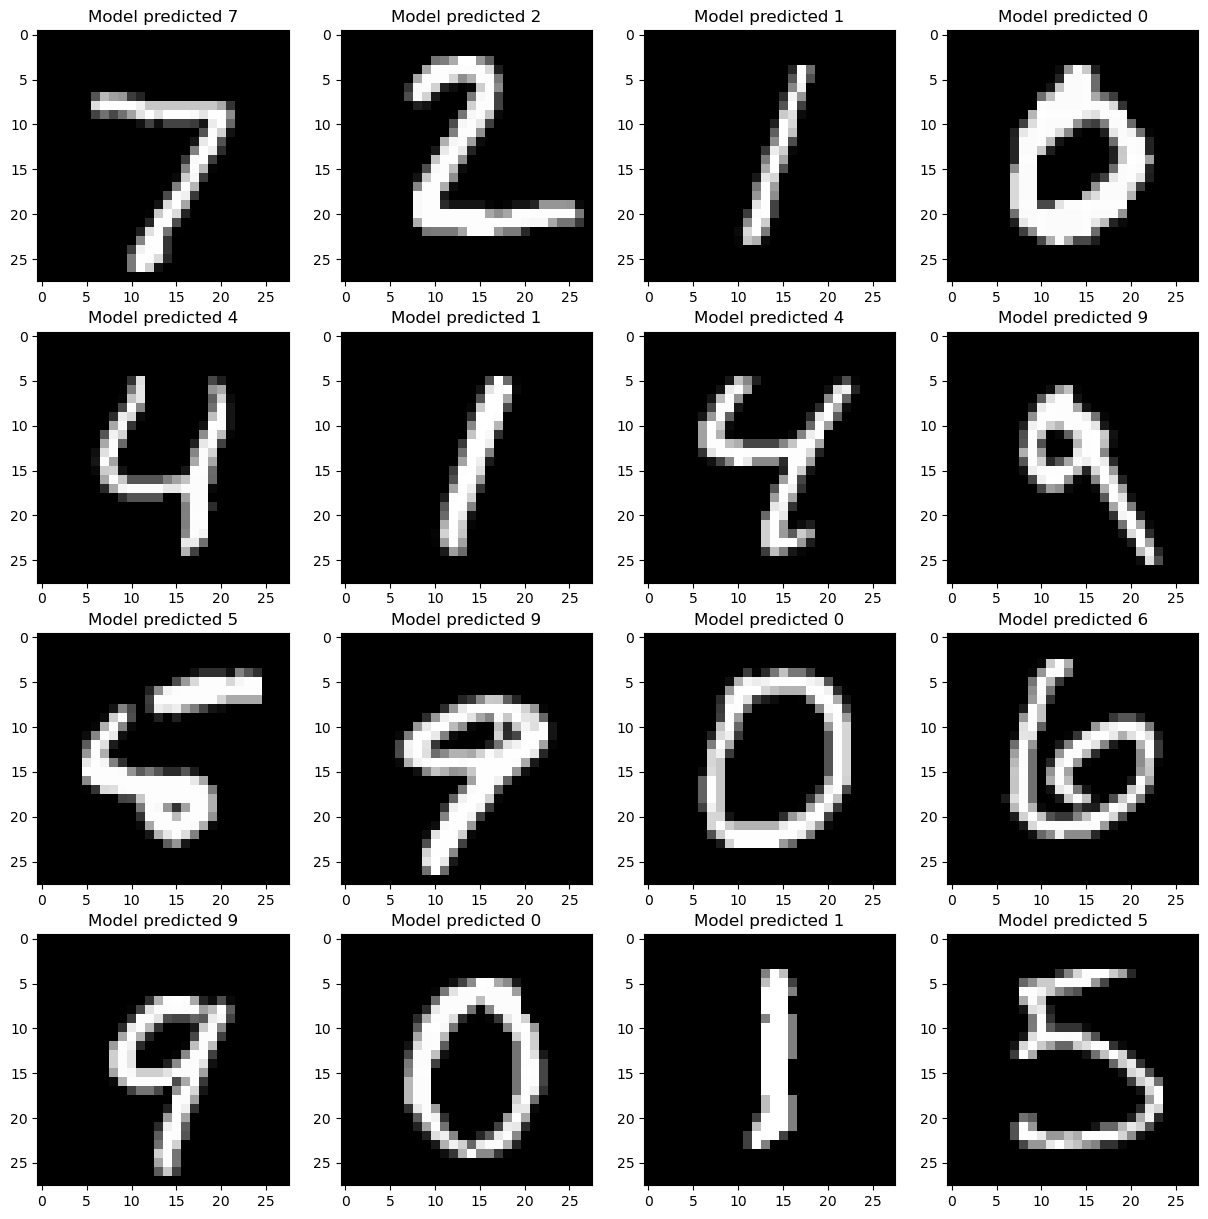

In [14]:
_, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()
i=0
predict_labels=np.argmax(model.predict(X_test), axis=-1)
for img, ax in zip(X_test, axs):
    ax.set_title("Model predicted "+str(predict_labels[i]))
    ax.imshow(img,cmap="gray")
    i+=1
plt.show()

In [15]:
df=pd.DataFrame(history.history)
df[["loss","val_loss"]].plot.line(template="plotly_dark")

NameError: name 'history' is not defined

In [ ]:
df[["accuracy","val_accuracy"]].plot.line(template="plotly_dark")

# Saving the Weights

In [ ]:
#model.save_weights('weights.h5')

# Loading the Weights

In [11]:
model.load_weights('weights.h5')

# Verifying the Save Weights

In [12]:
predictions = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0361 - accuracy: 0.9915
